# Normal (Gaussian) Distribution


### Formula

Also called the *Bell Curve*, The general form of it's probability density function is:
$$ f(x) = \frac {1} {\sqrt {2 \pi \sigma^2}} e^{-\frac {(x-\mu)^2} {2\sigma^2}} $$
where $\mu$ is the _mean_, $\sigma$ is the _standard deviation_ which gives $\sigma^2$ as the _variance_. We are going to rely heavily on this distribution to generate our dumb data.

**NumPy** has `np.random.normal()` function, that takes `loc` and `scale` (mean, std_dev) and yeilds a random number from that distribution.

In [25]:
import math
import numpy               as np
import matplotlib.pyplot   as plt
import matplotlib.gridspec as gridspec
import scipy.stats         as stats

#### some definitions:

In [9]:
def ndpdf(x, mu, sigma):
    return (1 / (math.sqrt(2 * math.pi * (sigma ** 2)))) \
        *  (math.e ** ((-(x - mu) ** 2) / (2 * (sigma ** 2))))
    
norm = np.random.Generator.normal

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.family': 'Iosevka NF',
    'font.weight': 'light',
    'font.size': 10,
    'axes.titlesize': 15,
    'axes.titleweight': 'bold',
    'axes.labelweight': 'bold',
    'axes.spines.top': False,
    'axes.spines.right': False,
    'figure.dpi': 300
})

### Bell curve shape:

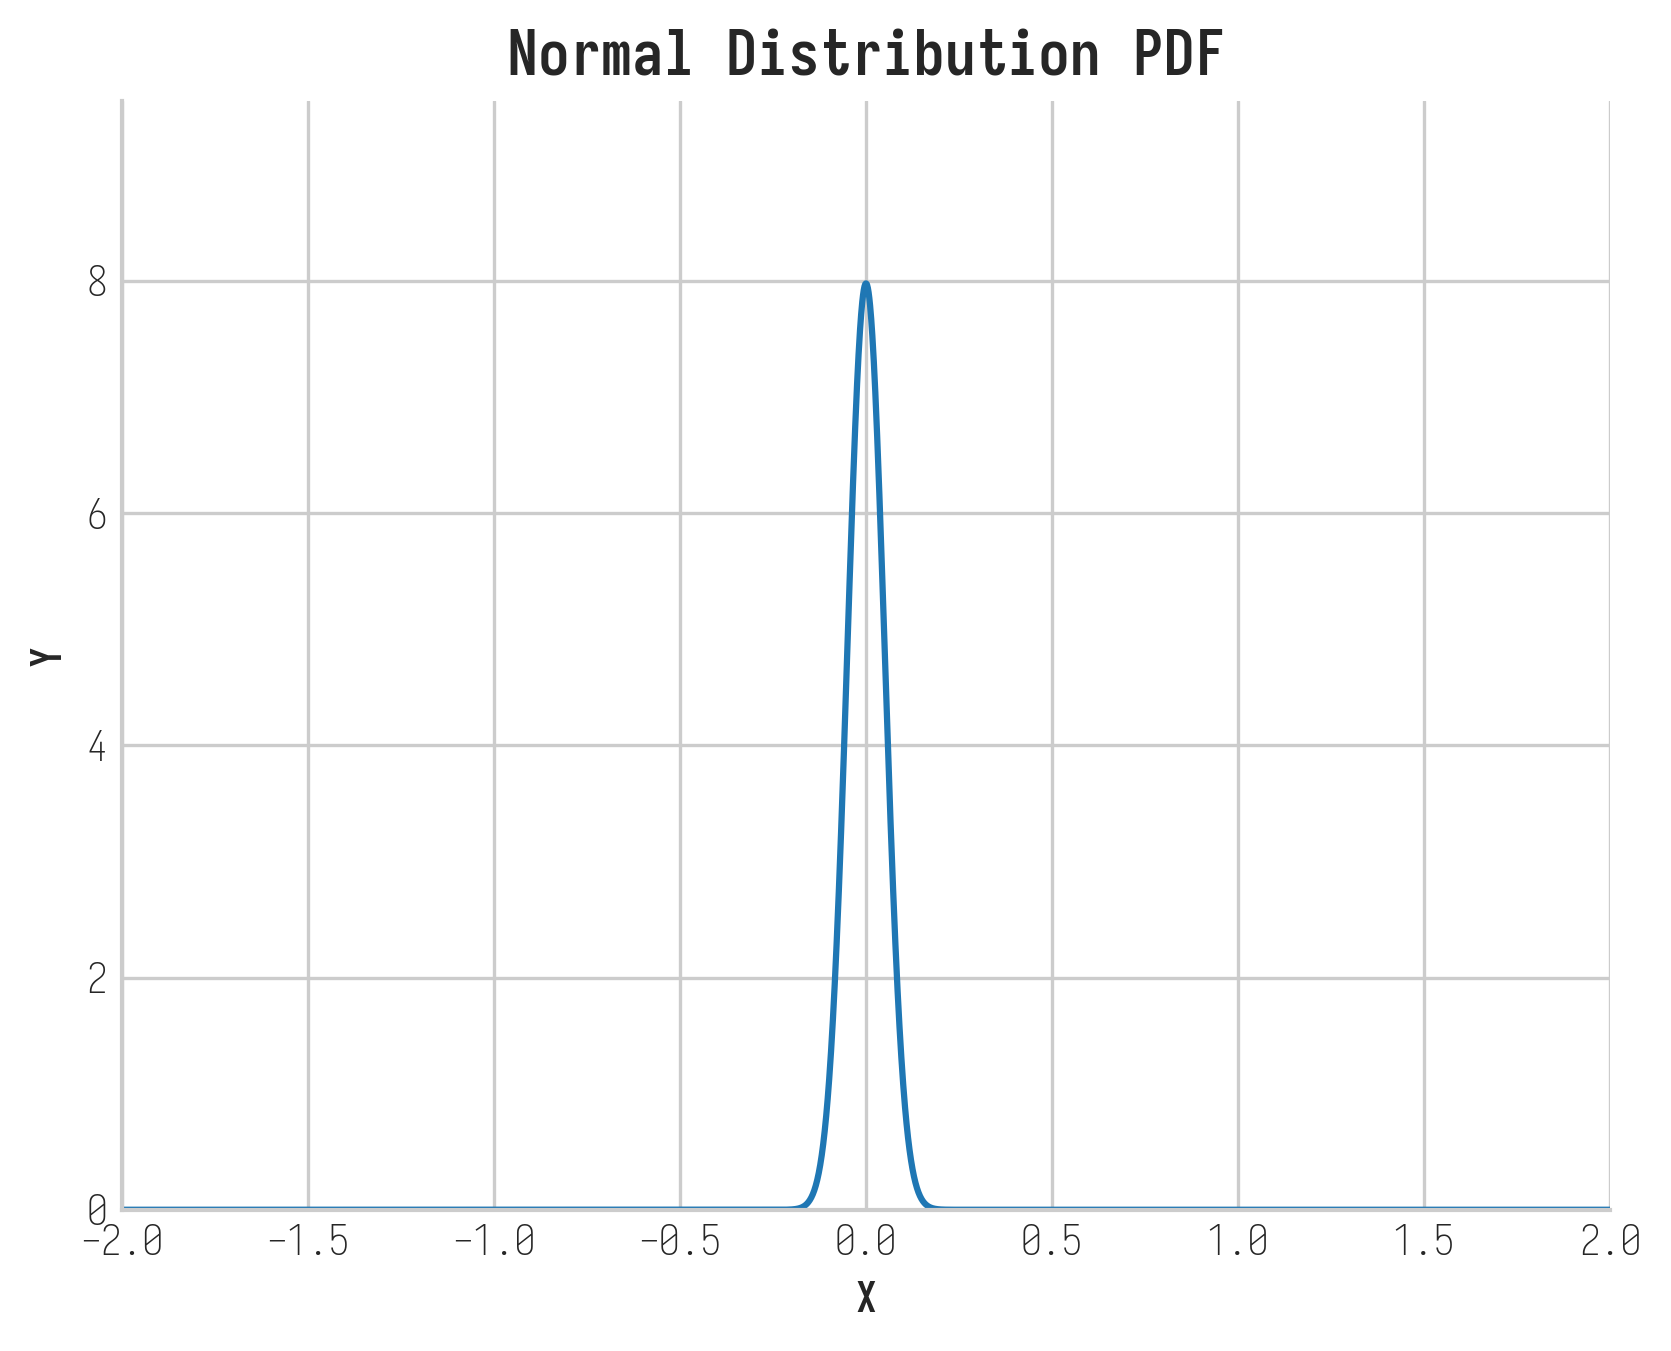

In [19]:
plt.figure(num=1, dpi=300)
plt.axis([-2, 2, 0, 9.55])

# x1, y1 = (np.arange(-100, 100, 0.1), [ndpdf(i, 0, 4) for i in np.arange(-100, 100, 0.1)])
# x2, y2 = (np.arange(-100, 100, 0.1), [ndpdf(i, 0, 2) for i in np.arange(-100, 100, 0.1)])
x3, y3 = (np.arange(-100, 100, 0.001), [ndpdf(i, 0, 0.05) for i in np.arange(-100, 100, 0.001)])
# x4, y4 = (np.arange(-100, 100, 0.1), [ndpdf(i, 0, 0.8) for i in np.arange(-100, 100, 0.1)])

# plt.plot(x1, y1, x2, y2, x3, y3, x4, y4)
plt.plot(x3, y3)
# plt.legend(["sigma = 4", "sigma = 2", "sigma = 1", "sigma = 0.8"])
plt.title("Normal Distribution PDF")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### Studying our data

#### Moderately Studied Data Genration Approach

For the working status categories (Productive, Active, Fragmented, Distracted, Idle), It's kinda obvious what is the working pattern for category:
- _Productive_: Mostly in Main Apps with HIGH input intensity (keystrokes/mouse).

- _Active_: Likely researching or reading documentation. Characterized by moderate Helper App usage, low keystrokes (reading mode), high mouse usage (scrolling), and low idle time.

- _Fragmented_: Characterized by a High `focus_switch_rate`. The user is rapidly jumping between Main, Helper, and Entertainment apps, often with moderate input but no sustained focus on a single task.

- _Distracted_: Dominated by Entertainment App usage. Input rate and idle time are irrelevant here; if the primary active window is non-work for a significant duration, the status is distracted.

- _Idle_: High `idle_percent` across all categories with *Low* input.

Also, we need to distinguish between the different parameters for each status. That means a working status is determined based on the following parameters/features:
```python
{
  focus_switch_rate       :int,
  overall_idle_percent    :float,
  main_keystrokes         :float,
  main_mouse_events       :float,
  helper_keystrokes       :float,
  helper_mouse_events     :float,
  entertain_keystrokes    :float,
  entertain_mouse_events  :float
}
```
However, generating some random values for each feature requires it's own PDF, with it's own mean $\mu$ and standard deviation $\sigma$, or given a fixed value with added noise later. Here are a "kinda" arbitrarilty choosen values:

| - | Productive | Active | Fragmented | Distracted | Idle |
| :--- | :---: | :---: | :---: | :---: | ---: |
|focus_switch_rate|$\mu=4,\sigma=2$|$\mu=8,\sigma=3$|$\mu=35,\sigma=10$|$\mu=10,\sigma=5$|$\mu=0,\sigma=0.5$|
|overall_idle_percent|$\mu=0.05,\sigma=0.02$|$\mu=0.1,\sigma=0.05$|$\mu=0.1,\sigma=0.02$|$\mu=0.05,\sigma=0.05$|$\mu=0.95,\sigma=0.05$|
|main_keystrokes|$\mu=0.8,\sigma=0.15$|$\mu=0.15,\sigma=0.1$|$\mu=0.4,\sigma=0.2$|$\mu=0.05,\sigma=0.05$|0.2|
|main_mouse_events|$\mu=0.5,\sigma=0.20$|0.2|0.2|0.2|0.2|
|helper_keystrokes|0.1|$\mu=0.2,\sigma=0.1$|0.1|0.1|0.1|
|helper_mouse_events|0.1|$\mu=0.7,\sigma=0.15$|0.1|0.1|0.1|
|entertain_keystrokes|0.05|0.05|$\mu=0.2,\sigma=0.15$|$\mu=0.75,\sigma=0.2$|0.05|
|entertain_mouse_events|0.05|0.05|0.05|$\mu=0.7,\sigma=0.2$|0.05|


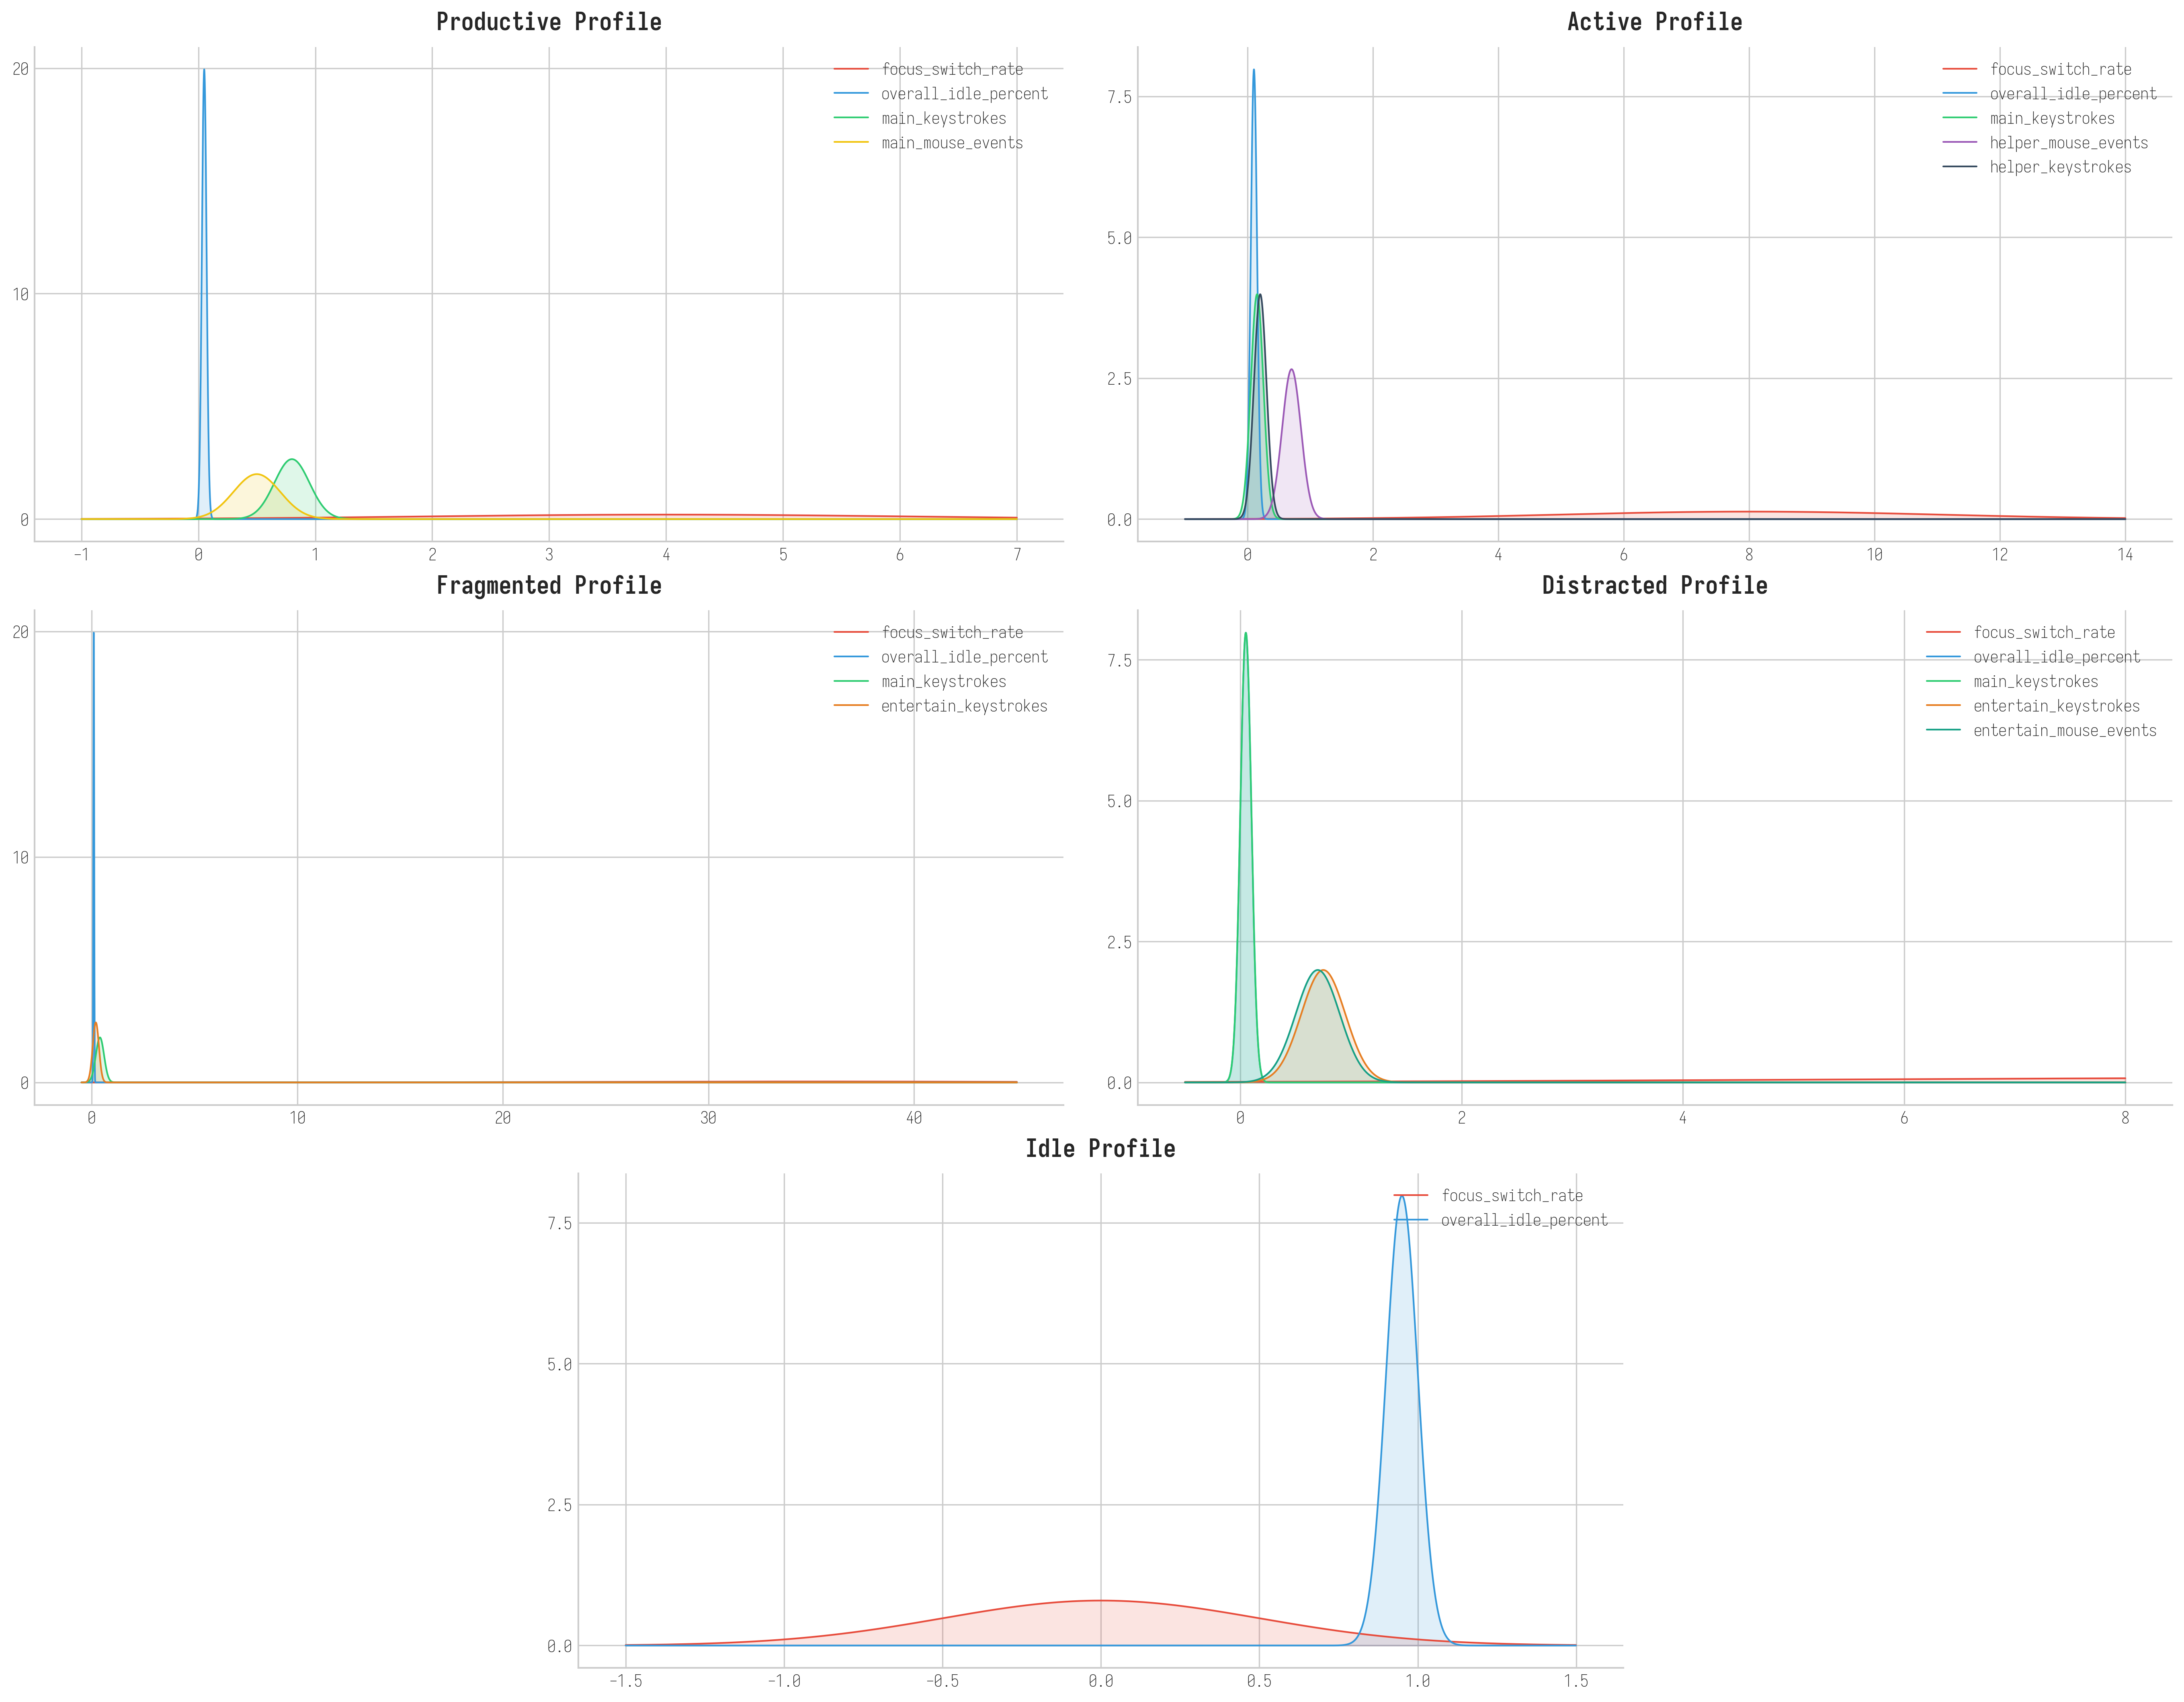

In [36]:
colors = {
    'focus_switch_rate':      '#E74C3C',  # Red
    'overall_idle_percent':   '#3498DB',  # Blue
    'main_keystrokes':        '#2ECC71',  # Green
    'main_mouse_events':      '#F1C40F',  # Yellow
    'helper_mouse_events':    '#9B59B6',  # Purple
    'helper_keystrokes':      '#34495E',  # Dark Blue/Grey
    'entertain_keystrokes':   '#E67E22',  # Orange
    'entertain_mouse_events': '#16A085',  # Teal
}

fig = plt.figure(figsize=(18, 14), constrained_layout=True)
gs = fig.add_gridspec(3, 4)

ax = []
ax.append(fig.add_subplot(gs[0, 0:2])) 
ax.append(fig.add_subplot(gs[0, 2:4])) 
ax.append(fig.add_subplot(gs[1, 0:2])) 
ax.append(fig.add_subplot(gs[1, 2:4])) 
ax.append(fig.add_subplot(gs[2, 1:3]))

plots_config = [
    {
        "title": "Productive",
        "x_range": np.arange(-1, 7, 0.001),
        "params": ['focus_switch_rate', 'overall_idle_percent', 'main_keystrokes', 'main_mouse_events'],
        "vals": [(4, 2), (0.05, 0.02), (0.8, 0.15), (0.5, 0.2)]
    },
    {
        "title": "Active",
        "x_range": np.arange(-1, 14, 0.001),
        "params": ["focus_switch_rate", "overall_idle_percent", "main_keystrokes", "helper_mouse_events", "helper_keystrokes"],
        "vals": [(8, 3), (0.1, 0.05), (0.15, 0.1), (0.7, 0.15), (0.2, 0.1)]
    },
    {
        "title": "Fragmented",
        "x_range": np.arange(-0.5, 45, 0.001),
        "params": ['focus_switch_rate', 'overall_idle_percent', 'main_keystrokes', 'entertain_keystrokes'],
        "vals": [(35, 10), (0.1, 0.02), (0.4, 0.2), (0.2, 0.15)]
    },
    {
        "title": "Distracted",
        "x_range": np.arange(-0.5, 8, 0.001),
        "params": ["focus_switch_rate", "overall_idle_percent", "main_keystrokes", "entertain_keystrokes", "entertain_mouse_events"],
        "vals": [(10, 5), (0.05, 0.05), (0.05, 0.05), (0.75, 0.2), (0.7, 0.2)]
    },
    {
        "title": "Idle",
        "x_range": np.arange(-1.5, 1.5, 0.001),
        "params": ["focus_switch_rate", "overall_idle_percent"],
        "vals": [(0, 0.5), (0.95, 0.05)]
    }
]

for i, config in enumerate(plots_config):
    current_ax = ax[i]
    x = config['x_range']
    
    for j, param_name in enumerate(config['params']):
        mu, sigma = config['vals'][j]
        y = ndpdf(x, mu, sigma)
        
        c = colors.get(param_name, '#333333')
        
        current_ax.plot(x, y, label=param_name, color=c, linewidth=1)
        current_ax.fill_between(x, y, color=c, alpha=0.15)

    current_ax.set_title(config['title'] + ' Profile', pad=10)
    current_ax.legend(loc='upper right', frameon=False, fontsize=10)
    current_ax.locator_params(axis='y', nbins=4)

plt.show()

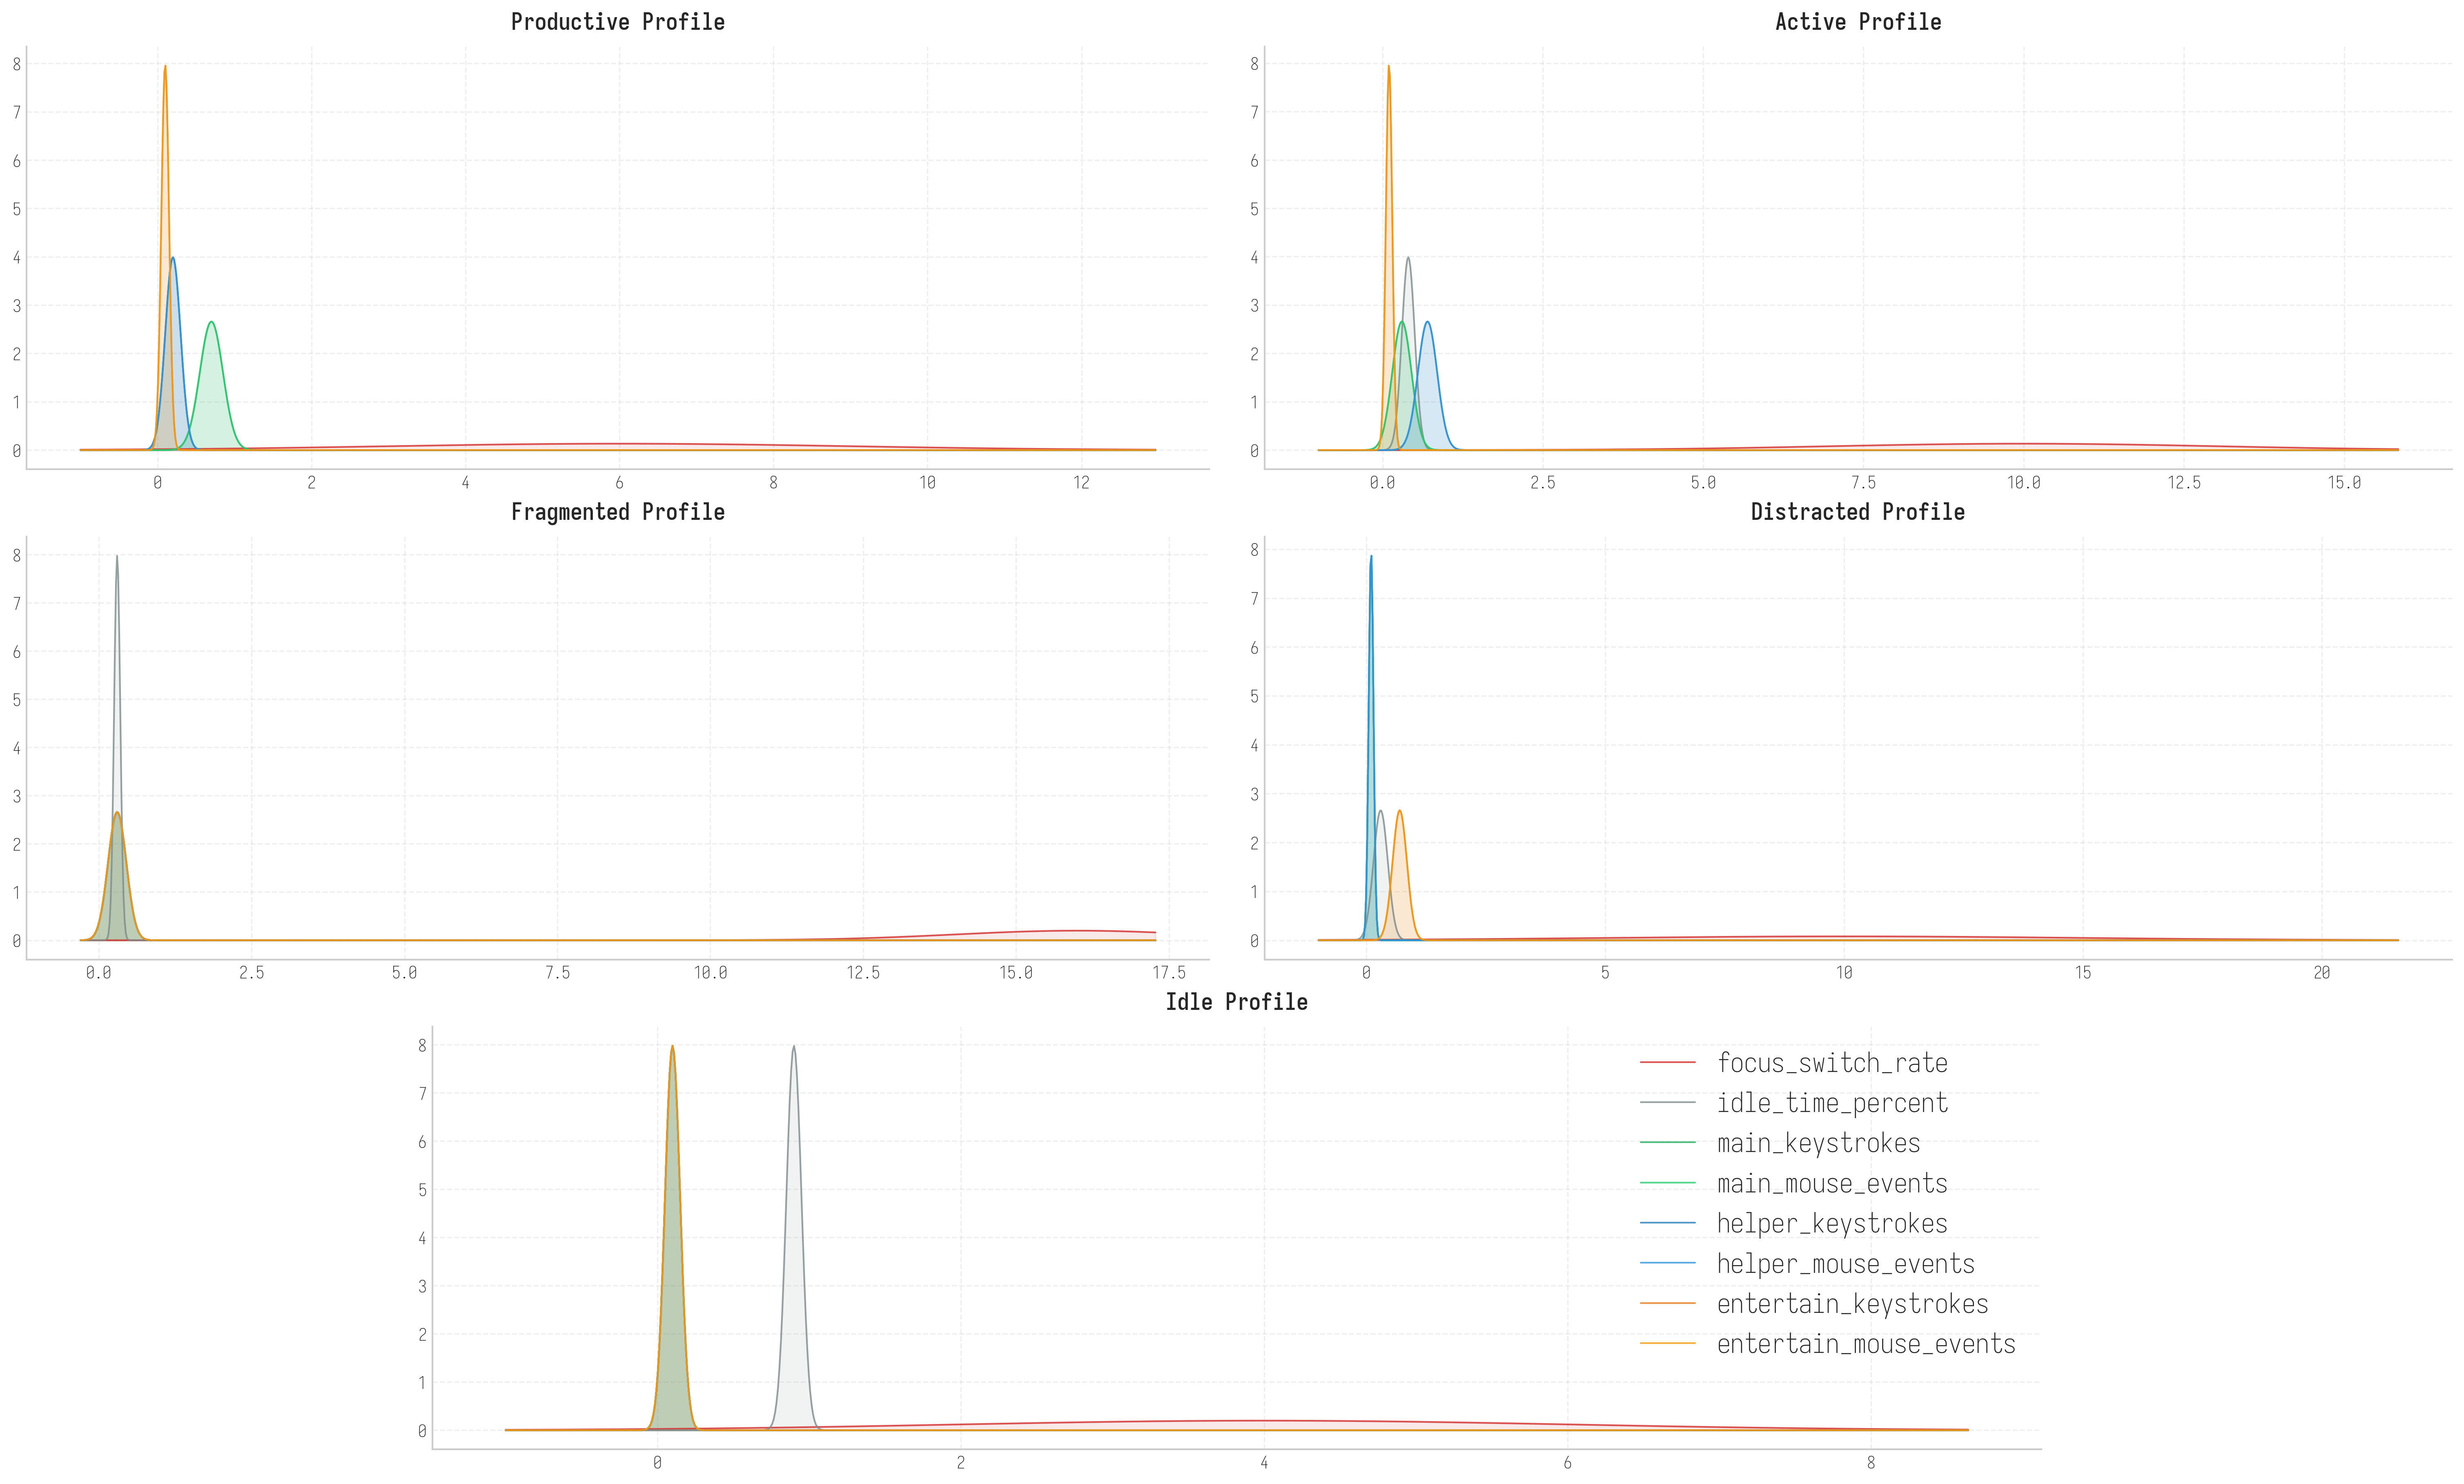

In [42]:
class LevelParser:
    LEVEL_MAP = {
        'L':  (0.0, 0.2), 'ML': (0.2, 0.4), 'M':  (0.4, 0.6),
        'MH': (0.6, 0.8), 'H':  (0.8, 1.0)
    }

    @staticmethod
    def get_stats(levels, scale=1.0):
        if isinstance(levels, str): levels = [levels]
        min_val = min(LevelParser.LEVEL_MAP[l][0] for l in levels)
        max_val = max(LevelParser.LEVEL_MAP[l][1] for l in levels)
        center = (min_val + max_val) / 2.0
        width = max_val - min_val
        # Mean = Center, Std = Width / 4 (covers the range with 95% confidence)
        return center * scale, (width / 4.0) * scale


profiles_logic = {
    'Productive': {
        'focus_switch_rate': ['L', 'M'], 'idle_time_percent': ['L', 'ML'],
        'main_keystrokes': ['M', 'H'],   'main_mouse_events': ['M', 'H'],
        'helper_keystrokes': ['L', 'ML'],'helper_mouse_events': ['L', 'ML'],
        'entertain_keystrokes': 'L',     'entertain_mouse_events': 'L'
    },
    'Active': {
        'focus_switch_rate': ['ML', 'MH'],'idle_time_percent': ['ML', 'M'],
        'main_keystrokes': ['L', 'M'],    'main_mouse_events': ['L', 'M'],
        'helper_keystrokes': ['M', 'H'],  'helper_mouse_events': ['M', 'H'],
        'entertain_keystrokes': 'L',      'entertain_mouse_events': 'L'
    },
    'Fragmented': {
        'focus_switch_rate': ['MH', 'H'], 'idle_time_percent': 'ML',
        'main_keystrokes': ['L', 'M'],    'main_mouse_events': ['L', 'M'],
        'helper_keystrokes': ['L', 'M'],  'helper_mouse_events': ['L', 'M'],
        'entertain_keystrokes': ['L', 'M'],'entertain_mouse_events': ['L', 'M']
    },
    'Distracted': {
        'focus_switch_rate': ['L', 'H'],  'idle_time_percent': ['L', 'M'], # Fixed logic
        'main_keystrokes': 'L',           'main_mouse_events': 'L',
        'helper_keystrokes': 'L',         'helper_mouse_events': 'L',
        'entertain_keystrokes': ['M', 'H'],'entertain_mouse_events': ['M', 'H']
    },
    'Idle': {
        'focus_switch_rate': ['L', 'ML'], 'idle_time_percent': 'H',
        'main_keystrokes': 'L',           'main_mouse_events': 'L',
        'helper_keystrokes': 'L',         'helper_mouse_events': 'L',
        'entertain_keystrokes': 'L',      'entertain_mouse_events': 'L'
    }
}

colors = {
    'focus_switch_rate':      '#D32F2F',  # Strong Red
    'idle_time_percent':      '#7F8C8D',  # Grey
    'main_keystrokes':        '#27AE60',  # Green
    'main_mouse_events':      '#2ECC71',  # Light Green
    'helper_keystrokes':      '#2980B9',  # Dark Blue
    'helper_mouse_events':    '#3498DB',  # Light Blue
    'entertain_keystrokes':   '#E67E22',  # Orange
    'entertain_mouse_events': '#F39C12'   # Yellow-Orange
}

def ndpdf(x, mu, sigma):
    return stats.norm.pdf(x, mu, sigma)

fig = plt.figure(figsize=(20, 12), constrained_layout=True)
gs = gridspec.GridSpec(3, 6, figure=fig)

ax_locs = [
    fig.add_subplot(gs[0, 0:3]), # Productive
    fig.add_subplot(gs[0, 3:6]), # Active
    fig.add_subplot(gs[1, 0:3]), # Fragmented
    fig.add_subplot(gs[1, 3:6]), # Distracted
    fig.add_subplot(gs[2, 1:5])  # Idle
]

profile_names = list(profiles_logic.keys())

for idx, profile in enumerate(profile_names):
    ax = ax_locs[idx]
    rules = profiles_logic[profile]
    
    x_min_limit, x_max_limit = 0, 1 
    
    plot_data = []

    for feature, level in rules.items():
        scale = 20.0 if feature == 'focus_switch_rate' else 1.0
        
        mu, sigma = LevelParser.get_stats(level, scale)
        
        lower = mu - 4*sigma
        upper = mu + 4*sigma
        x_min_limit = min(x_min_limit, lower)
        x_max_limit = max(x_max_limit, upper)
        
        plot_data.append({
            'label': feature,
            'mu': mu,
            'sigma': sigma,
            'color': colors[feature]
        })

    x_range = np.linspace(max(-1, x_min_limit), x_max_limit * 0.72, 1000)
    
    for item in plot_data:
        y = ndpdf(x_range, item['mu'], item['sigma'])
        ax.plot(x_range, y, label=item['label'], color=item['color'], linewidth=1, alpha=0.8)
        ax.fill_between(x_range, y, color=item['color'], alpha=0.1)

    ax.set_title(f"{profile} Profile", fontsize=14, fontweight='semibold', pad=10)
    ax.grid(True, linestyle='--', alpha=0.3)
    
ax.legend(loc='upper right', fontsize=16, framealpha=0.9)

plt.show()